<a href="https://colab.research.google.com/github/ibedoor/machine-learning/blob/main/03_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read in the dataset from the below link with pandas...

In [2]:
import pandas as pd

In [3]:
link = "https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv"
df = pd.read_csv(link)

2. Show me some of the data...

In [5]:
df

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog
...,...,...,...,...
195,55.0,140.0,1.0,horse
196,82.0,179.0,1.0,horse
197,46.0,132.0,1.0,horse
198,56.0,89.0,1.0,horse


In [17]:
df.isnull().sum()

height    0
weight    0
target    0
type      0
dtype: int64

In [10]:
df.type.unique()

array(['dog', 'horse'], dtype=object)

Visualization for each Type

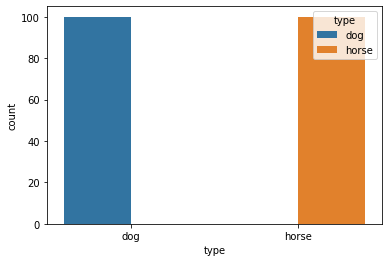

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


x = df['target'] == 1
y = df['target'] == 0
sns.countplot(x='type', data=df ,hue='type');

3. Split the data into training and testing sets ([Help](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [23]:
from sklearn.model_selection import train_test_split
X = df[['height', 'weight']]
y =df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

4. Make and fit a simple logistic regression model... (you shouldn't need to change anything here)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5. Make some predictions...

In [26]:
model.predict(X_test)

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1.])

In [32]:
# save them as variable `preds`
preds = model.predict(X_test)

sum(preds == y_test)

59

In [34]:
np.mean(y_test == preds)

0.9833333333333333

In [35]:
sum (preds == y_test ) / len(df)

0.295

6. What's the precision of the model? (Hint: Google 'sklearn precision')

In [37]:
from sklearn.metrics import average_precision_score
precision = average_precision_score(y_test, preds)
precision

0.9854166666666667

7. What's the recall of the model?

In [42]:
from sklearn.metrics import precision_recall_fscore_support
rec = precision_recall_fscore_support(y_test, preds, average=None)
rec

(array([0.96551724, 1.        ]),
 array([1.     , 0.96875]),
 array([0.98245614, 0.98412698]),
 array([28, 32]))

8. What's the mean sqared error of the model?

In [44]:
def mse(y_true, y_pred):
    sr = (y_pred - y_true) ** 2
    return sum(sr) / len(y_pred)

mse(y_test, preds)

0.016666666666666666

9. Run 2 different cross validations with different scoring parameters ([Help](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter))

Note: we're doing classification

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [47]:
model = KNeighborsClassifier(n_neighbors=1)

sum(preds == y_test) / 200

0.295

In [48]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=3)

cross_val_score(model, X, y)

array([0.95 , 0.95 , 0.975, 1.   , 0.6  ])

10. (Bonus) Throw it into a GridSearchCV... (any amount of parameters you want to test out).. of whatever you tested, what are the best parameters?

Note: You can find the possible parameters to adjust in the [LogisticRegression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))

Use penalty\
`penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’`

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {'logisticregression__fit_intercept':[True, False],
              'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none']}


grid = GridSearchCV(LR(), param_grid, cv=7)
grid

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [66]:
# fit the grid
link = "https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv"
df = pd.read_csv(link)
X = df[['height', 'weight']]
y =df.target
grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [67]:
# show me the best params
grid.best_params_

{'logisticregression__fit_intercept': True,
 'logisticregression__penalty': 'l2'}

11. (Bonus Bonus) What's your best r2_score?

In [68]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

0.9330357142857143